# Encontro de equilíbrio em sistemas lineares utilizando autovalores e autovetores

Neste projeto, utilizaremos conceitos de álgebra linear para resolver um problema de equilíbrio em sistemas lineares.

## Conceitos utilizados

Sistemas lineares que variam com o tempo podem ser representados por matrizes, da forma 
$$ 
x_t = A \cdot x_{t-1} 
$$ 
Considerando duas populações, a variação é dada pela derivada de suas funções. Imaginemos uma população de raposas e uma população de coelhos. Temos que suas variações podem ser dadas por:
$$
\frac{dR}{dt} = 1R
$$
$$
\frac{dC}{dt} = 3C - 1R
$$

Podemos imaginar vários estados iniciais das populações, para verificar como elas evoluem ao longo do tempo.
Vamos imaginar 3 casos, em que as populações de raposas e coelhos começam com (10,10), (10,2) e (0,3). Substituindo esses valores na fórmula que resulta na variação instantânea, teremos as seguintes direções (desconsiderando a intensidade dos vetores):

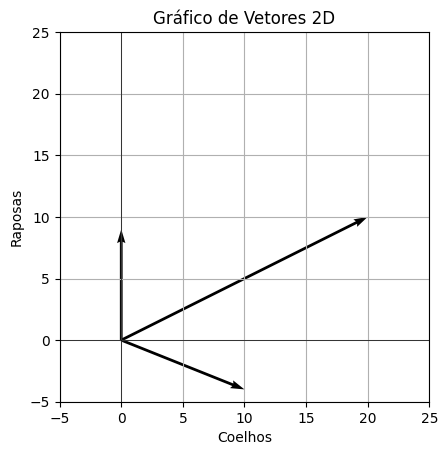

In [23]:
import numpy as np
import matplotlib.pyplot as plt

# Defina os vetores como linhas (cada vetor será uma linha 2D)
vetores = np.array([[20, 10], [10,-4], [0, 9]])

# Criação do gráfico
plt.figure()

# Plota cada vetor
for vetor in vetores:
    plt.quiver(0, 0, vetor[0], vetor[1], angles='xy', scale_units='xy', scale=1)

# Defina os limites dos eixos
plt.xlim(-5, 25)
plt.ylim(-5, 25)

# Título e rótulos dos eixos
plt.title("Gráfico de Vetores 2D")
plt.xlabel("Coelhos")
plt.ylabel("Raposas")

# Exibir o gráfico
plt.grid(True)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.gca().set_aspect('equal', adjustable='box')
plt.show()



Agora aplicando para vários pontos, conseguimos vizualizar como seria a variação de ambas as populações dadas diferentes populações iniciais. Com isso, obtemos um campo vetorial, que é o seguinte:

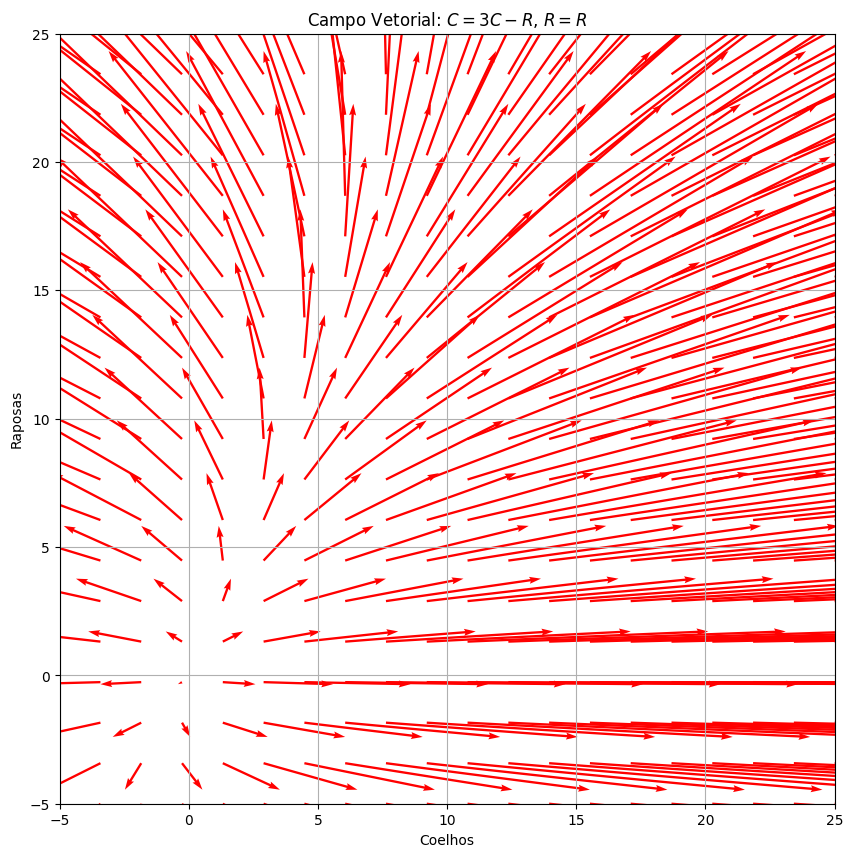

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Função que define o campo vetorial
def campo_vetorial(X, Y):
    # Equações para os vetores
    U = 3*X - Y   # Componente x do vetor
    V = Y         # Componente y do vetor
    return U, V

# Criação de uma grade de pontos (X, Y)
x = np.linspace(-5, 25, 20)  # Definindo os valores de x
y = np.linspace(-5, 25, 20)  # Definindo os valores de y
X, Y = np.meshgrid(x, y)    # Criando uma grade de coordenadas (X, Y)

# Obtendo as componentes do campo vetorial em cada ponto da grade
U, V = campo_vetorial(X, Y)

# Plotando o campo vetorial com quiver
plt.figure(figsize=(10, 10))
plt.quiver(X, Y, U, V, scale=100, color='r')
plt.xlim([-5, 25])
plt.ylim([-5, 25])
plt.xlabel('Coelhos')
plt.ylabel('Raposas')
plt.title('Campo Vetorial: $C = 3C - R$, $R = R$')
plt.grid(True)
plt.show()


Agora, podemos visualizar como as populações evoluiriam ao longo do tempo de acordo com seus estados iniciais. O seguinte código gera uma visualização:

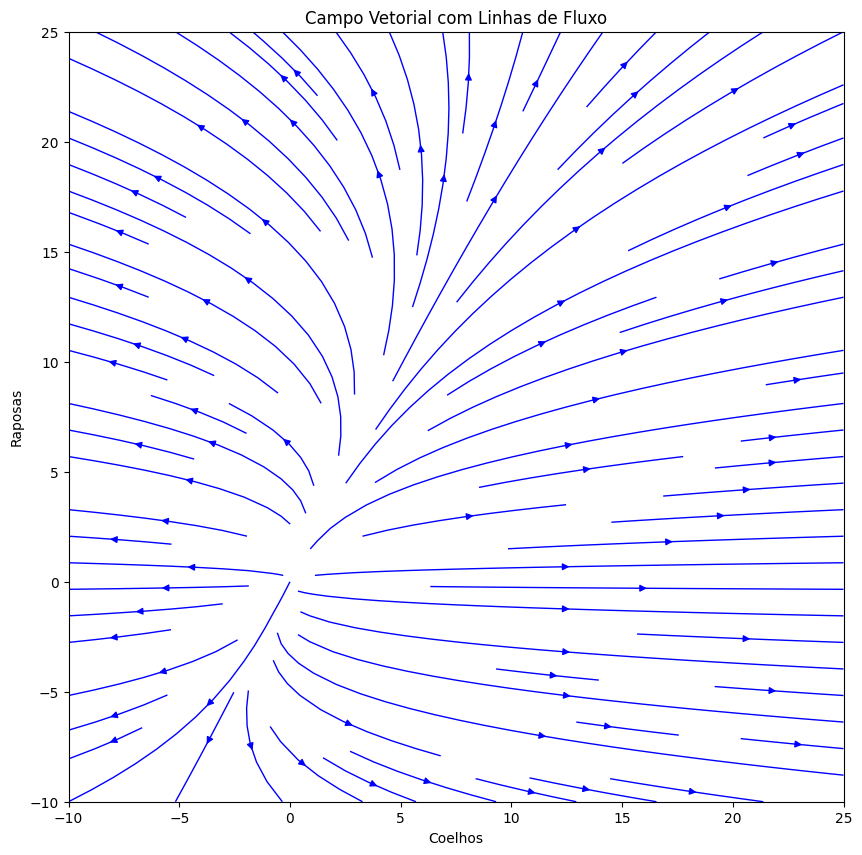

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Função que define o campo vetorial
def campo_vetorial(X, Y):
    # Definindo as equações para x e y
    U = 3*X - Y     # componente em x
    V = Y           # componente em y
    return U, V

# Criar uma grade de pontos (X, Y)
x = np.linspace(-10, 25, 20)
y = np.linspace(-10, 25, 20)
X, Y = np.meshgrid(x, y)

# Calcular as componentes do campo vetorial em cada ponto
U, V = campo_vetorial(X, Y)

# Plotando o campo vetorial com streamplot (linhas de fluxo)
plt.figure(figsize=(10, 10))
plt.streamplot(X, Y, U, V, color='b', linewidth=1)

# Títulos e rótulos
plt.title("Campo Vetorial com Linhas de Fluxo")
plt.xlabel('Coelhos')
plt.ylabel('Raposas')

# Exibindo o gráfico
plt.show()


A ideia agora é utilizar os autovalores e seus autovetores associados da matriz que representa esse sistema linear para, assim, encontrar em quais situações a população mantém uma dada proporção, ou seja, chega em seu equilíbrio.
Utilizaremos a biblioteca Numpy para obter os autovalores e seus autovetores associados. Esses auvovetores representarão em quais pontos eles podem evoluir de maneira constante, ou, de maneira mais didática, em quais pontos as linhas de fluxo se mantém lineares.
Cada linha da matriz representa a variação de cada uma das populações, ou seja:
$$ 
\begin{pmatrix} C' \\ R' \end{pmatrix} = \begin{pmatrix} 3 & -1 \\ 0 & 1 \end{pmatrix} \cdot \begin{pmatrix} C \\ R \end{pmatrix}
$$


In [30]:
import numpy as np

# Definindo a matriz
A = np.array([[3, -1], [0, 1]])

# Calculando os autovalores e autovetores
autovalores, autovetores = np.linalg.eig(A)

# Exibindo os resultados
print("Autovalores:", autovalores)
print("Autovetores:")
print(autovetores)


Autovalores: [3. 1.]
Autovetores:
[[1.         0.4472136 ]
 [0.         0.89442719]]


Percebemos que os dois autovalores são 3 e 1, ou seja, quando a população inicial é um múltiplo do autovetor $\mathbf{v_1}$, os valores são multiplicados por 3, e quando a população inicial é um múltiplo do vetor $\mathbf{v_2}$, a população é multiplicada por 1. Em ambos os casos, o equilíbrio do sistema é mantido. Podemos plotar as duas linhas nas direções desses dois autovetores:



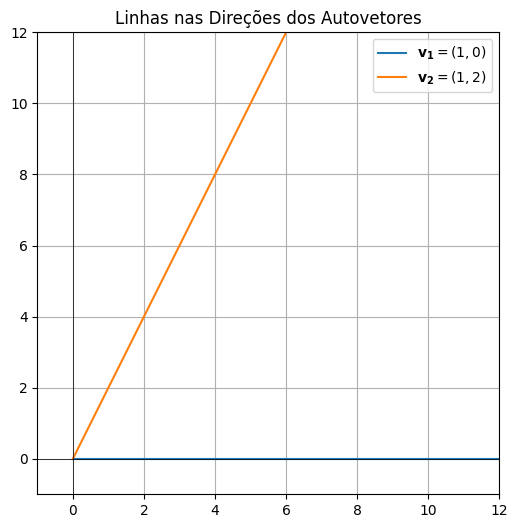

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definindo o intervalo para a linha
t = np.linspace(0, 15, 100)  # Linha que vai de 0 a 15

# Vetores diretores
v1 = np.array([1, 0])  # Direção do vetor (1, 0)
v2 = np.array([1, 2])  # Direção do vetor (1, 2)

# Criando as linhas a partir de (0,0)
linha1 = np.outer(t, v1)  # Multiplicando para estender a linha
linha2 = np.outer(t, v2)

# Plotando
plt.figure(figsize=(6,6))
plt.plot(linha1[:, 0], linha1[:, 1], label=r'$\mathbf{v_1} = (1, 0)$')
plt.plot(linha2[:, 0], linha2[:, 1], label=r'$\mathbf{v_2} = (1, 2)$')

# Adicionando rótulos
plt.xlim(-1, 12)
plt.ylim(-1, 12)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.gca().set_aspect('equal', adjustable='box')

# Exibindo a legenda
plt.legend()

#Exibindo título
plt.title('Linhas nas Direções dos Autovetores')

# Exibindo o gráfico
plt.show()
